In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
#Loading the dataset
eye_data = pd.read_csv("/home/oem/Documents/BBIT/3.2/AI/KNN/Eye.csv")

In [3]:
#Checking top 10 records of Dataset..
eye_data.head(10)

,recordId,age,spectaclePrescription,astigmatic,tearProductionRate,classLabelLenses
0,1,young,myope,no,reduced,noncontact
1,2,young,myope,no,normal,soft contact
2,3,young,myope,yes,reduced,noncontact
3,4,young,myope,yes,normal,hard contact
4,5,young,hypermetrope,no,reduced,noncontact
5,6,young,hypermetrope,no,normal,soft contact
6,7,young,hypermetrope,yes,reduced,noncontact
7,8,young,hypermetrope,yes,normal,hard contact
8,9,pre-presbyopic,myope,no,reduced,noncontact
9,10,pre-presbyopic,myope,no,normal,soft contact


In [4]:
#Basic Information regarding data
eye_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   recordId               10 non-null     int64 
 1   age                    10 non-null     object
 2   spectaclePrescription  10 non-null     object
 3   astigmatic             10 non-null     object
 4   tearProductionRate     10 non-null     object
 5   classLabelLenses       10 non-null     object
dtypes: int64(1), object(5)
memory usage: 608.0+ bytes


In [5]:
#Data points count value for each class labels..
eye_data.astigmatic.value_counts()

no     6
yes    4
Name: astigmatic, dtype: int64

In [6]:
#Data points count value for each class labels..
eye_data.age.value_counts()

young             8
pre-presbyopic    2
Name: age, dtype: int64

In [7]:
#Data points count value for each class labels..
eye_data.classLabelLenses.value_counts()

noncontact      5
soft contact    3
hard contact    2
Name: classLabelLenses, dtype: int64

In [8]:
#Data points count value for each class labels..
eye_data.tearProductionRate.value_counts()

reduced    5
normal     5
Name: tearProductionRate, dtype: int64

In [9]:
eye_data.spectaclePrescription.value_counts()

myope           6
hypermetrope    4
Name: spectaclePrescription, dtype: int64

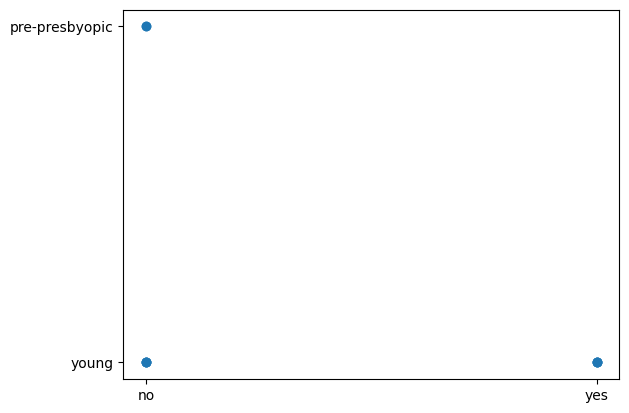

In [10]:
#Visualizing the dataset features to find pattern to solve our task
plt.scatter(eye_data['astigmatic'],eye_data['age'])
plt.show()

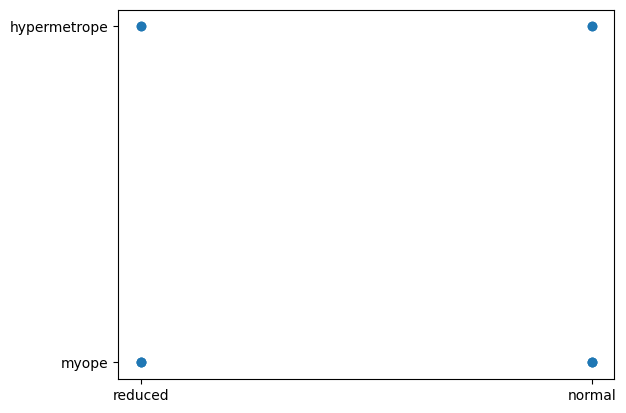

In [11]:
plt.scatter(eye_data['tearProductionRate'],eye_data['spectaclePrescription'])
plt.show()

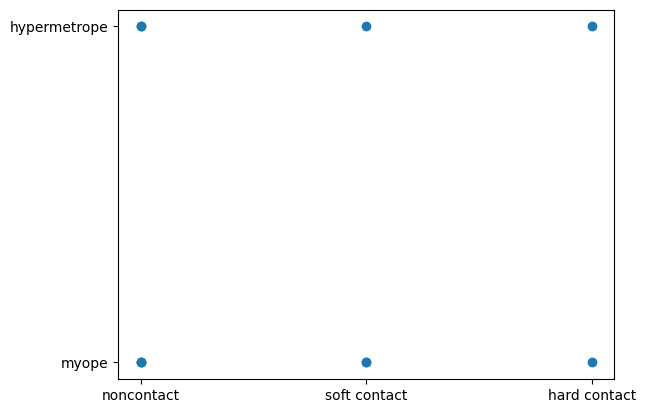

In [12]:
plt.scatter(eye_data['classLabelLenses'],eye_data['spectaclePrescription'])
plt.show()

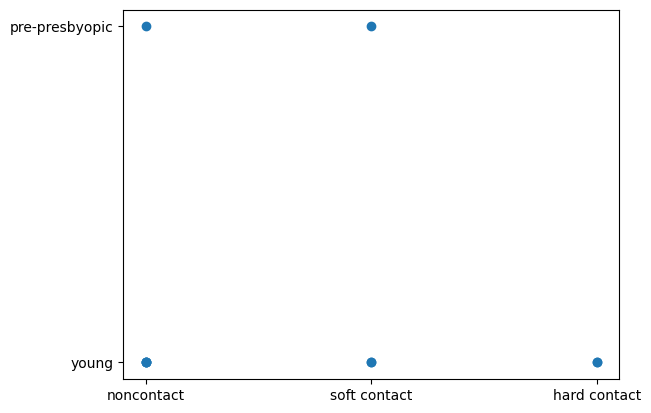

In [13]:
plt.scatter(eye_data['classLabelLenses'],eye_data['age'])
plt.show()

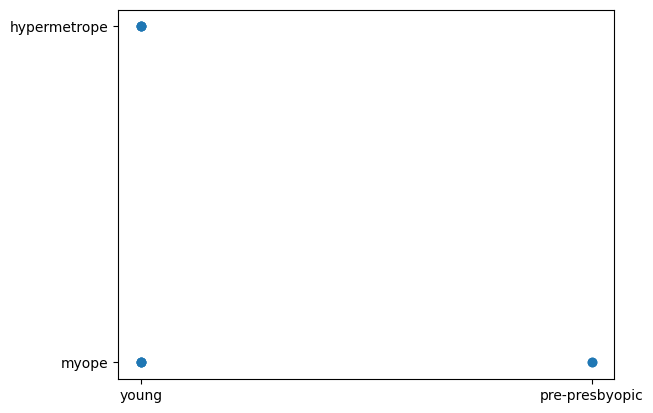

In [14]:
plt.scatter(eye_data['age'],eye_data['spectaclePrescription'])
plt.show()

In [15]:
# Building Classification Model
#Imporing few library for create Decision tree classifier and visualizing the tree structure'''
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [16]:
# separating each row
N=eye_data.iloc[:,:].values

In [17]:
# change the values from string to integers
labelencoder_X=LabelEncoder()
N[:,3]=labelencoder_X.fit_transform(N[:,3])
N[:,2]=labelencoder_X.fit_transform(N[:,2])
N[:,1]=labelencoder_X.fit_transform(N[:,1])
N[:,4]=labelencoder_X.fit_transform(N[:,4])


In [18]:
# output of converting each value to an integer
Z=pd.DataFrame(N)
Z

,0,1,2,3,4,5
0,1,1,1,0,1,noncontact
1,2,1,1,0,0,soft contact
2,3,1,1,1,1,noncontact
3,4,1,1,1,0,hard contact
4,5,1,0,0,1,noncontact
5,6,1,0,0,0,soft contact
6,7,1,0,1,1,noncontact
7,8,1,0,1,0,hard contact
8,9,0,1,0,1,noncontact
9,10,0,1,0,0,soft contact


In [19]:
feature_columns = [1,2,3,4]
X = Z[feature_columns].values
y = Z[5].values

In [20]:
#Data Splitting
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)

In [22]:
Xtrain.shape, Xtest.shape

((7, 4), (3, 4))

[Text(0.6, 0.8333333333333334, 'X[3] <= 0.5\ngini = 0.611\nsamples = 6\nvalue = [2, 3, 1]'),
 Text(0.4, 0.5, 'X[2] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]')]

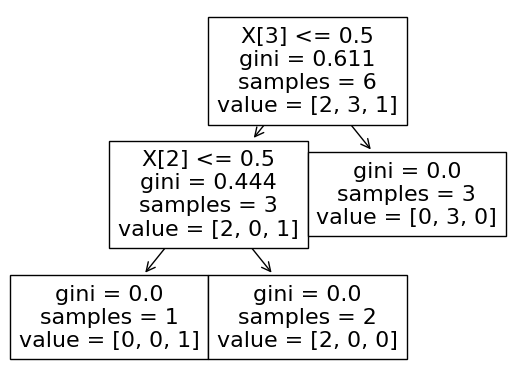

In [23]:
#Creating the decsion tree
Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)
#Visualized the Tree which is formed on train dataset
tree.plot_tree(Iris_clf)

In [24]:
y

array(['noncontact', 'soft contact', 'noncontact', 'hard contact',
       'noncontact', 'soft contact', 'noncontact', 'hard contact',
       'noncontact', 'soft contact'], dtype=object)

In [28]:
#Accuracy
print('Accuracy score is:',cross_val_score(Iris_clf, Xt, Yt, cv=2, scoring='accuracy').mean())

Accuracy score is: 0.8333333333333333


/home/oem/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


In [29]:
#Checking validation test data on our trained model and getting performance metrices
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
Y_hat = Iris_clf.predict(Xcv)

In [30]:
print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 1.0


array([[[0, 0],
        [0, 1]]])

In [31]:
YT_hat = Iris_clf.predict(Xtest)
YT_hat

array(['noncontact', 'soft contact', 'soft contact'], dtype=object)

In [32]:
print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[2, 0],
        [0, 1]],

       [[1, 0],
        [0, 2]]])

[Text(0.6, 0.8333333333333334, 'X[3] <= 0.5\ngini = 0.571\nsamples = 7\nvalue = [2, 4, 1]'),
 Text(0.4, 0.5, 'X[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]')]

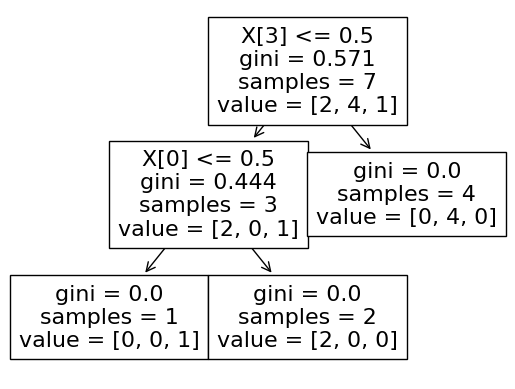

In [33]:
#Training model on Actual train data... '''
Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)
#Visualize tree structure..
tree.plot_tree(Iris_Fclf)

In [34]:
#Checking the performance of model on Actual Test data...
YT_Fhat = Iris_Fclf.predict(Xtest)
YT_Fhat
print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 33.33333333333333 %


array([[[1, 2],
        [0, 0]],

       [[2, 0],
        [0, 1]],

       [[1, 0],
        [2, 0]]])